# Machine Learning Integrated Project
### Project Description:

Our goal in this project is to build a model that predicts the amount of gold recovered from gold ore.
We have historical data on extraction and purification.

The model will help to optimize the production and eliminate unprofitable parameters.

We want to predict two values:

- Rougher.output.recovery
- Final.output.recovery

In the following sections, we will prepare the data, train and test machine learning models, and evaluate the machine learning models performance with dummy model.

<a id="contents"></a>
# Table of contents

- [Step 1](#step1) Prepare the data
- [Step 2](#step2) Analyze the data
- [Step 3](#step3) Build the model

#### Importing Python libraries

In [1]:
!pip install -q --upgrade pandas

In [2]:
!pip install --upgrade scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 23.2 MB 129 kB/s ta 0:00:010


In [3]:
#pip install -U imbalanced-learn

In [1]:
# Basic
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from scipy import stats as st
from pprint import pprint
warnings.filterwarnings("ignore")

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.utils import shuffle
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.impute import KNNImputer

# Modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
#from imblearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

# Metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve 
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer

# Visualization
import seaborn as sns

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<a id="step1"></a>
## Step 1. Prepare the data

[back to table of contents](#contents)

### Open the files and look into the data.

In [2]:
# Downloading the files and saving it as a datafarme

try:
    data_train     = pd.read_csv('/datasets/gold_recovery_train.csv')
    data_test     = pd.read_csv('/datasets/gold_recovery_test.csv')
    data_full     = pd.read_csv('/datasets/gold_recovery_full.csv')
except:
    data_train     = pd.read_csv('gold_recovery_train.csv' , encoding = "ISO-8859-1")
    data_test     = pd.read_csv('gold_recovery_test.csv' , encoding = "ISO-8859-1")
    data_full     = pd.read_csv('gold_recovery_full.csv' , encoding = "ISO-8859-1")

In [3]:
data_train.shape

(16860, 87)

In [4]:
data_test.shape

(5856, 53)

In [5]:
data_full.shape

(22716, 87)

In [6]:
data_train.head(3)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


### Check that recovery is calculated correctly. 
Using the training set, calculate recovery for the rougher.output.recovery feature. 

In [8]:
# Recovery calculation formula: RECOVERY =  ((C * (F - T))/(F * (C - T))) * 100

# target =  rougher.output.recovery
#C = rougher.output.concentrate_au
#F = rougher.input.feed_au
#T = rougher.output.tail_au

# filtering rows where target column is null
# calculating recovery from the filtered data set

recovery_data = data_train.dropna(subset=['rougher.output.recovery'])
calculated_recovery = ((recovery_data['rougher.output.concentrate_au'] * (recovery_data['rougher.input.feed_au'] - recovery_data['rougher.output.tail_au']))/ (recovery_data['rougher.input.feed_au'] * (recovery_data['rougher.output.concentrate_au'] - recovery_data['rougher.output.tail_au'])))*100

In [9]:
calculated_recovery.shape

(14287,)

In [10]:
actual_recovery = data_train['rougher.output.recovery'].dropna().to_list()

In [11]:
len(actual_recovery)

14287

#### Find the MAE between your calculations and the feature values. Provide findings.

In [12]:
# Calculating MAE betwwen calculated and actual target

print(f"Mean Absolute Error: {mean_absolute_error(actual_recovery, calculated_recovery)}")

Mean Absolute Error: 9.303415616264301e-15


#### Conclusions:
As a preliminary stage, we wanted to check the correctness of the data set. We did it by manualy calculating the rougher process recovery based on a given formula, and comparing our results with those given in the data set.
We filtered out inspections with NaN target.
We calculated the Mean Absolute Error between the two values.
The result is 9.3e-15, which is very small. Hence, we can conclude that the calculated and actual recovery do not differ, and that the data set we have is valid.

### Analyze the features not available in the test set. What are these parameters? What is their type?

In [13]:
data_full.shape

(22716, 87)

In [14]:
data_test.shape

(5856, 53)

In [15]:
features_not_in_test = [x for x in data_full.columns if x not in data_test.columns]

pprint(features_not_in_test)

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

In [16]:
len(features_not_in_test)

34

**Conclusions:**

There are 34 features on the full data set that does not exist in the test set.
We can see that these parameters are of output or calculation types. Probably these featues are missing because their values are known only after the purification process.

We must have the same number and identity of features in the training and test sets, so we must remove these features from the training set.

Two of the features that are missing from the test dataset, are required as target: 'final.output.recovery' and 'rougher.output.recovery', and these two should be merged from the full dataset to the test dataset.

In [17]:
# Merge target values from data_full into data_test.
data_test = pd.merge(data_test, data_full[['date', 'final.output.recovery', 'rougher.output.recovery']],
                     on='date',
                     how='left'
                    )

In [18]:
# Drop features that are missing at data_test from data_train 

data_train = data_train.drop(columns=[x for x in data_train if x not in data_test], axis=1)

In [19]:
# Are there features in data_test that are missing from data_train? 
features_not_in_train = [x for x in data_test.columns if x not in data_train.columns]

pprint(features_not_in_train)

[]


There are no features that can be found only at the test set

In [20]:
data_train.shape

(16860, 55)

In [21]:
data_test.shape

(5856, 55)

Now both data sets have the same number of features

### Perform data preprocessing.

In [22]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        16860 non-null  object 
 1   final.output.recovery                       15339 non-null  float64
 2   primary_cleaner.input.sulfate               15553 non-null  float64
 3   primary_cleaner.input.depressant            15598 non-null  float64
 4   primary_cleaner.input.feed_size             16860 non-null  float64
 5   primary_cleaner.input.xanthate              15875 non-null  float64
 6   primary_cleaner.state.floatbank8_a_air      16820 non-null  float64
 7   primary_cleaner.state.floatbank8_a_level    16827 non-null  float64
 8   primary_cleaner.state.floatbank8_b_air      16820 non-null  float64
 9   primary_cleaner.state.floatbank8_b_level    16833 non-null  float64
 10  primary_cl

In [23]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 0 to 5855
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

#### Checking for duplications

In [24]:
data_train.duplicated().sum()

0

In [25]:
data_train['date'].duplicated().sum()

0

In [26]:
data_test.duplicated().sum()

0

In [27]:
data_test['date'].duplicated().sum()

0

**Summary:** 

I checked for duplicated rows, once as a complete inspection, and once only for the date column, wich should be unique. the other features does not have to be unique.

I didn't find any duplications

#### Data types

Except for the date column, all the other features are of the 'float64' data type, so there is no need to convert them. We also don't have any boolean features.

Regarding the date, which is of 'Object' data type, since it does not have any function in our prediction, we will drop it later on and we don't need to change it's data type.

#### Looking for missing values

As we can see from the df.info(), there are many features with missing values. The ratio of NaN values changes from feature to feature between 1% to 16%.



In [28]:
print("Rows with missing values in the data_train set:", round(data_train.isnull().any(axis=1).sum(), 2))
print("Rate of missing values in the data_train set:", round(data_train.isnull().any(axis=1).sum()/len(data_train), 2))

print("Rows with missing values in the data_test set:", round(data_test.isna().any(axis=1).sum(), 2))
print("Rate missing values in the data_test set:", round(data_test.isna().any(axis=1).sum()/len(data_test), 2))

Rows with missing values in the data_train set: 4181
Rate of missing values in the data_train set: 0.25
Rows with missing values in the data_test set: 627
Rate missing values in the data_test set: 0.11


In [29]:
# What is the rate of NaNs for each column?

round(data_train.loc[:,data_train.columns].isnull().sum()/data_train.loc[:,data_train.columns].count(),4).sort_values(ascending=False)

rougher.output.recovery                       0.1801
rougher.input.floatbank11_xanthate            0.1273
final.output.recovery                         0.0992
primary_cleaner.input.sulfate                 0.0840
primary_cleaner.input.depressant              0.0809
rougher.input.floatbank10_sulfate             0.0660
primary_cleaner.input.xanthate                0.0620
rougher.input.floatbank11_sulfate             0.0384
rougher.state.floatbank10_e_air               0.0371
rougher.input.feed_rate                       0.0314
rougher.input.feed_size                       0.0254
secondary_cleaner.state.floatbank2_a_air      0.0220
rougher.input.floatbank10_xanthate            0.0210
rougher.input.feed_sol                        0.0176
rougher.input.feed_pb                         0.0137
secondary_cleaner.state.floatbank2_b_air      0.0093
secondary_cleaner.state.floatbank4_a_air      0.0077
secondary_cleaner.state.floatbank4_a_level    0.0067
secondary_cleaner.state.floatbank3_a_level    

**Summary:**

- 25% of the rows in the train dataset have some missing values! thats a lot, and as so we can't just drop these inspections. filling the missing values with statistical measurements like mean or mode is not suitable in this case, since the features' values are very precise and will lost their correlation with the target and with other features.

- We have a better way of filling the missing values: since we know that "Parameters that are next to each other in terms of time are often similar", we beleive that the KNN - K-Nearest Neighbor method - can provide us the best estimation of a NaNs value.

- Since this method is a distance-based algorithm and in order not to give more weight to one variable over the other, we will scale the data before filling the NaNs.

- Analysing each feature's missing values' rate, is showing that there are about 10 features having more then 2.5% missing values, and that the two targets are in the top rank of missing values rate: 18% and 10%
- For the targets, we can fill the NaN's using the recovery calculation formula, which was found to be accurate.

#### Standardize numerical features

In [30]:
# we'll use Scaling for numeric columns

non_scaling_features = ['date', 'rougher.output.recovery', 'final.output.recovery']
scaling_features = [x for x in data_train.columns if x  not in non_scaling_features]

In [31]:
# We will use Standard scaler: (Old value - Mean value) / Standard deviation
scaler = StandardScaler()

# We fit the scaler on TRAINING dataset in order to prevent data leakage
scaler.fit(data_train[scaling_features])

# We apply fitted scaler to both train and test datasets
data_train_scaled = pd.DataFrame(scaler.transform(data_train[scaling_features].copy()), columns = scaling_features)
data_test_scaled = pd.DataFrame(scaler.transform(data_test[scaling_features].copy()), columns = scaling_features)

In [32]:
data_train_scaled.head(3)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,-0.052611,0.406453,-0.076371,0.345866,0.074948,0.088861,0.072276,-0.113460,0.089595,0.106923,...,-0.738787,-0.098154,-0.446449,-0.314571,-0.856516,0.024940,-0.690950,-0.018440,-0.614805,-1.089046
1,-0.084841,0.451865,-0.076371,0.379043,0.144388,0.063192,0.136584,0.093704,0.155475,0.098696,...,-0.742354,-0.133711,-0.471353,-0.276705,-0.839892,0.000782,-0.706210,-0.019793,-0.636792,-1.010584
2,-0.124709,0.727659,-0.076371,0.351847,0.211193,0.074877,0.200682,0.084410,0.221076,0.078968,...,-0.739051,-0.098542,-0.477646,-0.274488,-0.835259,0.001312,-0.701528,-0.019007,-0.632436,-1.031839


#### Fill missing values using K-Nearest Neighbor imputer

In [33]:
#Create instance of KNNImputer class using default parameters.
imputer = KNNImputer()

# Fill NaNs; fit and transform the train dataset. Impute all missing values in test dataset
data_train_filled = imputer.fit_transform(data_train[scaling_features])
data_test_filled = imputer.transform(data_test[scaling_features])

In [34]:
# Add the non scaled columns (date + targets) back to each dataset.
data_train_scaled = pd.concat([data_train[non_scaling_features]] + \
                              [pd.DataFrame(data_train_filled, columns=scaling_features)], axis = 1)

data_test_scaled = pd.concat([data_test[non_scaling_features]] + \
                             [pd.DataFrame(data_test_filled, columns=scaling_features)], axis = 1)

In [35]:
# We should check for missing values in the target colums

print("Rows with missing values in the data_train_scaled set:", round(data_train_scaled.isnull().any(axis=1).sum(), 2))
print("Rate of missing values in the data_train_scaled set:", round(data_train_scaled.isnull().any(axis=1).sum()/len(data_train_scaled), 2))

print("Rows with missing values in the data_test_scaled set:", round(data_test_scaled.isnull().any(axis=1).sum(), 2))
print("Rate missing values in the data_test_scaled set:", round(data_test_scaled.isnull().any(axis=1).sum()/len(data_test_scaled), 2))

Rows with missing values in the data_train_scaled set: 2711
Rate of missing values in the data_train_scaled set: 0.16
Rows with missing values in the data_test_scaled set: 566
Rate missing values in the data_test_scaled set: 0.1


We have around 16% of the inspections with NaN value in a target column. filling the target is not an option. So, we have to drop these rows and we still have a big enough dataset for our purpose.

In [36]:
#Drop rows with NaNs in test dataset.
data_train_scaled = data_train_scaled.dropna().reset_index(drop=True)
data_test_scaled = data_test_scaled.dropna().reset_index(drop=True)

#### Summary:

- No duplicate rows found in the datasets
- Data types are all float, so we don't have to convert them to numeric values for the models
- The only exceptional is the data, but we will not use it as a feature in our prediction
- Missing values: There were a lot of them.
 - Features' missing values were filled using K nearest neighbor imputer, which uses the fact that parameters that are next to each other in terms of time are often similar.
 - Target columns were not filled, and were dropped, leaving us enough data for our mission.
- Before filling the missing values, we normalized the data, in order to avoid giving un balanced weights to the variables.   

<a id="step2"></a>
## Step 2. Analyze the data

[back to table of contents](#contents)

### Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.

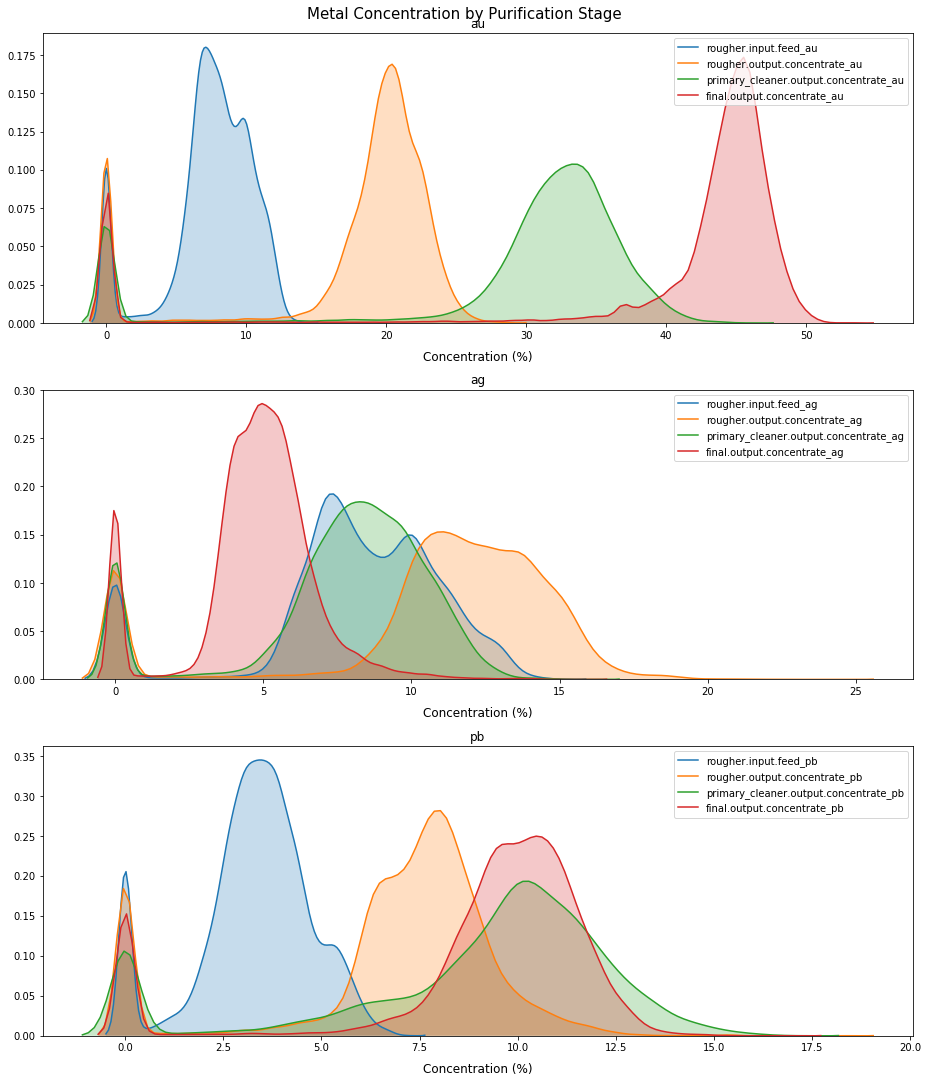

In [37]:
metals = ['au', 'ag', 'pb']
stage_columns = ['rougher.input.feed','rougher.output.concentrate', 'primary_cleaner.output.concentrate', 'final.output.concentrate']

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(13, 15))
for i, metal in enumerate(metals):
    for column in stage_columns:
        ax = i
        sns.kdeplot(data_full[(column+'_'+ metal)], ax=axes[ax], shade='fill', label=(column+'_'+ metal))
        axes[ax].legend()
        axes[ax].set_title(metal)
        axes[ax].set_xlabel('Concentration (%)', fontsize=12, labelpad = 10)

fig.suptitle('Metal Concentration by Purification Stage', fontsize=15, y=1)        
plt.tight_layout()
plt.show()        

**Conclusions:**
- Au (Gold): We can see in the first graph, that from stage to stage the concentration of gold is getting higher. from around 10% in the first stage as ore mixture, to around 45% in the final stage 
- Ag (Silver): The concentration of silver is increasing between the first and second stages, but then it decresed back to the initial stage's rate, and decresed even more in the final stage. 
- Pb (Lead): The lead concentration is increasing between the 1'st, 2'nd and 3'rd stages and also improving in the final stage, the average does not change but the variation gets lower.
- All the metals at all stages have a small 'tail' around 0. My assumption is that these are batches of very low quality ore mixture. Maybe we should treat them as outliers. I will decide on it later.

### Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect.

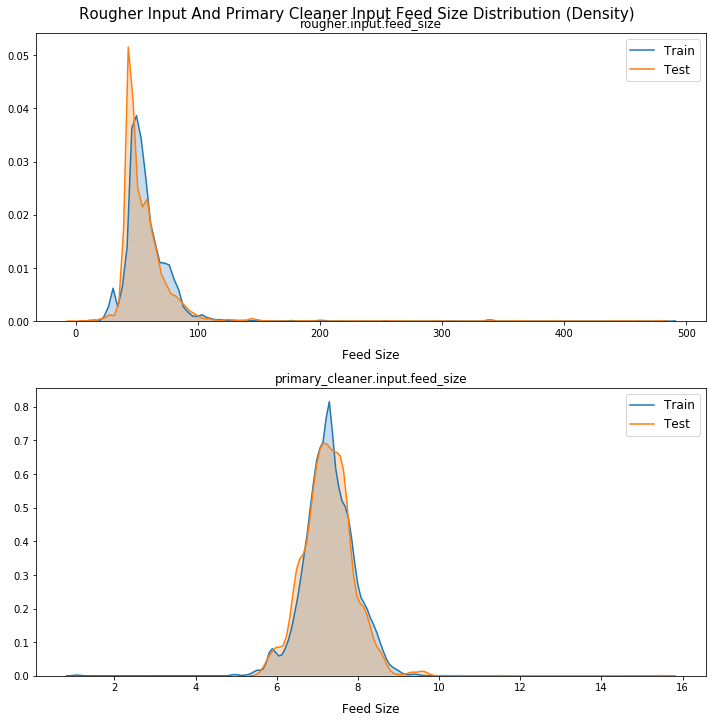

In [38]:
# Create graphs to visualize the distribution of feed_size in training and testing datasets

columns = ['rougher.input.feed_size','primary_cleaner.input.feed_size']

fig = plt.figure(figsize=(10, 10))
for i, column in enumerate(columns):
        plt.subplot(2, 1, i+1)
        sns.kdeplot(data_train[column], shade='fill', label='Train')
        sns.kdeplot(data_test[column], shade='fill', label='Test')
        plt.legend(fontsize=12)
        plt.title(column)
        plt.xlabel('Feed Size', fontsize=12, labelpad = 10)

fig.suptitle('Rougher Input And Primary Cleaner Input Feed Size Distribution (Density)', fontsize=15, y=1)        
plt.tight_layout()
plt.show();  

**Conclusions:**
The graphes that visualize the distributions of practical size on 'Rougher input' and 'Primary cleaner input' stages, show roughly the same distributions for train and test datasets at each stage.

This finding confirms the feasibility of building a good model based on the provided datasets.

### Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? 

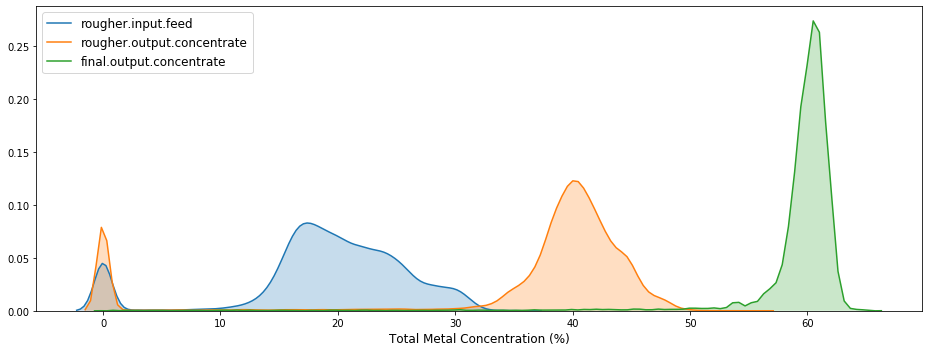

In [39]:
# Plotting the distribution of total concentration of all metals at different stages.
metals = ['au', 'ag', 'pb']
stage_columns = ['rougher.input.feed','rougher.output.concentrate', 'final.output.concentrate']

fig = plt.figure(figsize=(13, 5))
for column in stage_columns:
        sns.kdeplot(data_full[(column+'_au')]+data_full[(column+'_ag')]+data_full[(column+'_pb')], label=column, shade='fill')
        plt.legend(fontsize=12)

plt.xlabel('Total Metal Concentration (%)', fontsize=12)
    
plt.tight_layout()
plt.show()       

### Describe the findings and eliminate anomalies.

As we noticed earlier, we can see it also with the total concentration of all metals, for every stage there is a small but noticeable population of inspections around zero concentration. 

These inspections does not represent a normal inspection in the process we analyse, so we will filter them out in order not to negatively affect the model results. I will set the threshold value to 7.

Our data sets now are normalized, so we can't filter the outliers based on calculating the threshold value out of them. We have to filter rows from the original full data set and then remove the corresponding rows from the train and test based on the date index. 

In [40]:
# Filtering out the outliers, keeping just the 'main' inspections, where the total concentration of all metals > 7

data_full_main = data_full.loc[(data_full[['rougher.input.feed_au', 'rougher.input.feed_pb', 'rougher.input.feed_ag']].sum(axis=1) > 7) \
     & (data_full[['rougher.output.concentrate_au', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_ag']].sum(axis=1) > 7) \
     & (data_full[['final.output.concentrate_au', 'final.output.concentrate_pb', 'final.output.concentrate_ag']].sum(axis=1) > 7)]

In [41]:
print('data_train_scaled rows: ', len(data_train_scaled))
print('data_test_scaled rows: ', len(data_test_scaled))

data_train_scaled rows:  14149
data_test_scaled rows:  5290


In [42]:
#Remove outliers from scaled testing and training datasets based on whether date is in gold_full_no_outliers.

data_train_scaled = data_train_scaled.loc[data_train_scaled['date'].isin(data_full_main['date'])].reset_index(drop=True)
data_test_scaled = data_test_scaled.loc[data_test_scaled['date'].isin(data_full_main['date'])].reset_index(drop=True)

In [43]:
print('data_train_scaled no outliers: ', len(data_train_scaled))
print('data_test_scaled no outliers: ', len(data_test_scaled))

data_train_scaled no outliers:  13772
data_test_scaled no outliers:  5149


<a id="step3"></a>
## Step 3. Build the model

[back to table of contents](#contents)

### Write a function to calculate the final sMAPE value.

In [44]:
#Create function to calculate sMAPE.
def smape(y_true, y_pred):
    smape = (np.abs(y_true - y_pred) / ((np.abs(y_true) + np.abs(y_pred)) / 2)).mean() * 100 
    return smape

In [45]:
#Create function to calculate final sMAPE.
def final_smape(y_true, y_pred):
    smape_rougher_out = smape(y_true[:, 0], y_pred[:, 0]) 
    smape_final_out = smape(y_true[:, 1], y_pred[:, 1]) 
    final = (0.25 * smape_rougher_out) + (0.75 * smape_final_out)
    return final

### Train different models. Evaluate them using cross-validation. 

In [46]:
# Splitting the datasets to features and targets

# Preparing list of feature and training columns.
targets = ['rougher.output.recovery', 'final.output.recovery']
features = [col for col in data_train_scaled if col not in targets and col != 'date']

# Split the datasets to features and targets.

features_train, features_test = data_train_scaled[features].values, data_test_scaled[features].values
target_train, target_test = data_train_scaled[targets].values, data_test_scaled[targets].values

In [47]:
# Defining a function for model evaluation using cross-validation and sMAPE scoring

def cv_model_evaluation(model):
    scores = cross_val_score(model, features_train, target_train, scoring=smape_score)
    print('Mean smape: {:0.3f}. folds: {}'.format(scores.mean(), scores))

In [48]:
# Defining scorer
smape_score = make_scorer(final_smape, greater_is_better=False)

In [51]:
# Decision Tree Regressor

# Let's optimize the model by finding the best hyperparameters
parameters = {'max_depth': range(3, 15, 3), 'min_samples_split' : range(1, 10, 2)}
dtr = GridSearchCV(DecisionTreeRegressor(random_state=12345), parameters, cv=5, scoring = smape_score)
dtr.fit(features_train, target_train)

#cv_model_evaluation(dtr)
print(abs(dtr.best_score_), dtr.best_params_)

9.162695475899033 {'max_depth': 3, 'min_samples_split': 3}


In [52]:
# Linear Regression

lr = LinearRegression()
lr.fit(features_train, target_train)

cv_model_evaluation(lr)

Mean smape: -10.006. folds: [-12.13328895  -8.90417575  -8.30502138  -8.07818073 -12.60894352]


In [ ]:
# Random Forest Regressor

# Let's optimize the model by finding the best hyperparameters
parameters = {'n_estimators': range(10, 70, 20), 'max_depth': range(3, 12, 3), 'min_samples_split' : range(1, 4, 1)}
rfr = GridSearchCV(RandomForestRegressor(random_state=12345), parameters, cv=5,scoring = smape_score)
rfr.fit(features_train, target_train)

#cv_model_evaluation(rfr)
print(abs(rfr.best_score_), rfr.best_params_)

In [ ]:
# Lasso Regressor

parameters = {'alpha' : np.arange(.01, 1, 0.1)}
LassoRegressor = GridSearchCV(Lasso(), parameters, cv=5,scoring = smape_score)
LassoRegressor.fit(features_train, target_train)

#cv_model_evaluation(LassoRegressor)
print(abs(LassoRegressor.best_score_), LassoRegressor.best_params_)

**Summary:**

We trained 4 different models, where in some of them we used GridSearchCV for obtaining the mean of scores and also optimizing the model by choosing best hyperparameters, and in others we used only cross validation.
Our metric for evaluations is sMAPE score, and for each model we have the mean sMAPE score out of 5 itterations.

**The results (from the best model down):**
1. Random Forest Regressor: 8.68
2. Decision Tree Regressor: 9.16
3. Lasso Regressor: 9.29 
4. Linear Regression: 10.006

### Pick the best model and test it using the test sample. Provide findings.

In [49]:
#Create instance of best regression model and fit it to training data.

best_model = RandomForestRegressor(random_state=12345, max_depth= 3, min_samples_split= 3, n_estimators= 50).fit(features_train, target_train)

#Obtain final sMAPE score for model using testing datasets.
best_model_smape = round(final_smape(target_test, best_model.predict(features_test)), 2)

print(f'sMAPE score for best model on test datasets: {best_model_smape}')

sMAPE score for best model on test datasets: 7.12


In [50]:
# Sanity check the model: find the dummy (average) model scoring

dummy_model_smape = final_smape(target_test, np.tile(np.mean(target_train, axis=0), (len(target_test), 1)))

print(f'sMAPE score for sanity check model: {dummy_model_smape}')

sMAPE score for sanity check model: 7.710530795316553


**Summary & Conclusions:**

Our goal was to build a model that predicts the amount of gold recovered from gold ore. We have historical data on extraction and purification. We received 3 data sets: full one, and two pre-divided sets of train and test.

1. We had to solve the issue of train and test datasets not having identical features. In the test dataset, some advanced parameters were missing. we solved it by dropping these features also from the train dataset.
2. We validated the data by comparing the provided values of rougher recovery to the values we calculated based on the recovery formula. The mean_absolute_error we received was absolutely negligible, what confirms the data validity.
3. Data preproccesing:
   - the data contains relatively high rate of missing values. luckily, we could use KNN method and fill the NaNs with the mean value of nearest inspections in time, which suppose to be close in value.
   - Yet, around 16% of the data had NaN in the target columns. these inspections were droped from the datasets.
4. All numerical features (beside the targets) were normalized.
5. Analysis:
   - We examined the concentration of metals at various stages and sow that the gold concentration is gradually improving, while the other metals behaviour is not consistent.
   - We exemined the distributions of practical size in train and test data sets, to ensure the distributions are generaly the same - and confirmed it.
   - Outliers existed around zero, and we decided to remove all rows with total metals concentration below 7.
6. Model: finally, we defined functions for calculating sMAPE score and the weighted final sMAPE 
   - 4 Models were trained and optimized and selected the estimator which provided the lowest sMAPE score
   - The best mean score was given by Random Forest Regressor (8.68)
7. Testing the model:
   - We have tested the random forest regressor model, with its best hyperparameters on the test set.
   - The results were better then what we received on the train set (7.12)
   - Sanity check - score of dummy model also provided better score then the one of the best model on test set(7.71)
   
**Recommendations:**   
The last two findings may imply for the test set being less distributed and more concentrated around the mean. If this is the case, then retraining and testing with randomized datasets would be a good idea.   
We would also recommend on studing the correlations between the features and the targets and use only those features who predict better.